In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.shape

(5110, 12)

# dropping id

In [4]:
data = df.drop('id', axis=1)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


 # Finding unique values

In [5]:
catFeatures = ['gender', 'hypertension', 'heart_disease','ever_married', 'work_type', 'Residence_type', 'smoking_status']
for catFeature in catFeatures:
    print(data[catFeature].unique())

['Male' 'Female' 'Other']
[0 1]
[1 0]
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [6]:
data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

for catFeature in catFeatures:
    plt.figure(figsize=(10,5))
    sns.countplot(x = data[catFeature])
    plt.show()

sns.pairplot(data)
plt.show()

In [9]:
data['smoking_status'].replace('Unknown', np.nan, inplace=True)

In [10]:
data.isna().sum()

gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   201
smoking_status       1544
stroke                  0
dtype: int64

In [11]:
data['bmi'].fillna(data['bmi'].mean(), inplace=True)
data['smoking_status'].fillna(data['smoking_status'].mode()[0], inplace = True)

data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

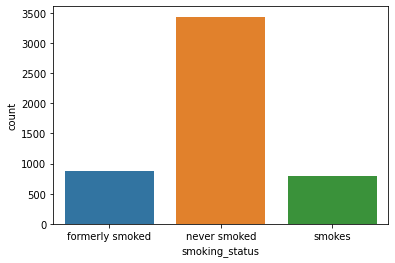

In [12]:
sns.countplot(x = data['smoking_status'])

plt.figure(figsize=(10,7))
sns.distplot(data["bmi"])
plt.show()

# Label encoding

In [14]:
le = LabelEncoder()

en_data = data.apply(le.fit_transform)

en_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,88,0,1,1,2,1,3850,240,0,1
1,0,82,0,0,1,3,0,3588,162,1,1
2,1,101,0,1,1,2,0,2483,199,1,1
3,0,70,0,0,1,2,1,3385,218,2,1
4,0,100,1,0,1,3,0,3394,113,1,1


# Feature scaling

In [15]:
y = en_data['stroke']
X = en_data.drop('stroke', axis = 1)

# Splitting and Scaling Data

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Random RandomForestClassifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("The Training Score of RandomForestClassifier is: {:.3f}%".format(model_rf.score(X_train, y_train)*100))
print("\n----------------------------------------------------------------------\n")
print("The Confusion Matrix for RandomForestClassifier is: \n{}\n".format(confusion_matrix(y_test, y_pred)))
print("\n----------------------------------------------------------------------\n")
print("The Classification report: \n{}\n".format(classification_report(y_test, y_pred)))
print("\n----------------------------------------------------------------------\n") 
print("The Accuracy Score of RandomForestClassifier is: {:.3f}%".format(accuracy_score(y_test, y_pred)*100))

The Training Score of RandomForestClassifier is: 100.000%

----------------------------------------------------------------------

The Confusion Matrix for RandomForestClassifier is: 
[[970   2]
 [ 49   1]]


----------------------------------------------------------------------

The Classification report: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.33      0.02      0.04        50

    accuracy                           0.95      1022
   macro avg       0.64      0.51      0.51      1022
weighted avg       0.92      0.95      0.93      1022



----------------------------------------------------------------------

The Accuracy Score of RandomForestClassifier is: 95.010%


In [21]:
# Calculate feature importances
importances = model_rf.feature_importances_
# Sort feature importances in descending order
std = np.std([tree.feature_importances_ for tree in model_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

<AxesSubplot:>

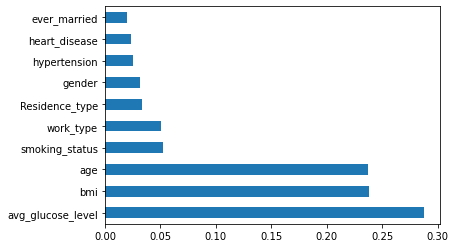

In [22]:
(pd.Series(model_rf.feature_importances_, index=X.columns)
   .nlargest(10)
   .plot(kind='barh'))  